# A Colorful example of using NetworkX
## From the NetworkX Documentation
* Visualize size and distances between cities
* Uses 'miles_dat.txt.gz'
* Stores city location and population as attributes of graph
* Nodes are city names

In [1]:
%matplotlib inline

In [18]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import re
import sys
import gzip
import copy
DATADIR = os.path.join("..","Resources")
os.path.exists(DATADIR)
import random

### An example using networkx.Graph().

miles_graph() returns an undirected graph over the 128 US cities from
the datafile miles_dat.txt. The cities each have location and population
data.  The edges are labeled with the distance betwen the two cities.

This example is described in Section 1.1 in Knuth's book [1,2].

References.


1. Donald E. Knuth,
    "The Stanford GraphBase: A Platform for Combinatorial Computing",
    ACM Press, New York, 1993.
1. [Knuth Stanford Graph Database](http://www-cs-faculty.stanford.edu/~knuth/sgb.html)


### Aric Hagberg (hagberg@lanl.gov)

Copyright (C) 2004-2006 by    
Aric Hagberg <hagberg@lanl.gov>    
Dan Schult <dschult@colgate.edu>    
Pieter Swart <swart@lanl.gov>   
All rights reserved.    
BSD license.   

### Description

This notebook provides a nice illustration of a very basic **undirected** graphic: Cities are nodes in the graphs and connections between cities are edges. To keep the graph "pretty" we are not providing edges between all the cities.

#### Drawing Graphs

NetworkX has a lot of built in drawing capabilities based on [``matplotlib``](http://matplotlib.org/). Defaults probably won't be very pretty, but if you delve into the details you can customize the drawing a lot. 

#### What does our data look like?

For each City we have:

* The name of the city
* The coordinates of the city
* The population of the city


### Functions and Methods in ``draw_graph``

* ``plt.figure``: This creates a matplotlib figure. In the function we are specifiying the size of the figure (in inches?)
* In graph theory the [degree of a node (vertex)](https://en.wikipedia.org/wiki/Degree_(graph_theory)) is the number of edges connected to that node. NetworkX provides a function to return the degree of a node.

In [3]:
def draw_graph(H, plot_name="plot.png"):
    """
    
    """

    plt.figure(figsize=(12,12))
    # with nodes colored by degree sized by population
    # List comprehension
    node_color=[float(H.degree(v)) for v in H]
    nx.draw(H,H.position,
         node_size=[H.population[v] for v in H],
         node_color=node_color,alpha=0.4,
         with_labels=True,
           font_size=8)

    # scale the axes equally
    plt.xlim(-5000,500)
    plt.ylim(-2000,3500)

    plt.savefig(plot_name)
    plt.show()
   

### NetworkX methods and functions in ``miles_graph``

Graphs are objects and so we can add attributes to them. In this function we add two dictionaries to the graph ``G``: ``position`` and ``population``.

Each graph also has a dictionary named ``graph`` that attributes could have been added to.

* ``g.add_edge``
* ``g.add_node``

In [4]:
demo = nx.Graph()
print(demo.graph)
demo.graph["population"] = {}
demo.graph["position"] = {}
print(demo.graph)

{}
{'population': {}, 'position': {}}


In [5]:
def miles_graph(fname):
    """ Return the cites example graph in fname
        from the Stanford GraphBase.
    """
    # open file miles_dat.txt.gz (or miles_dat.txt)
    G=nx.Graph()
    G.position={}
    G.population={}

    cities=[]
    with gzip.open(fname,'r') as fh:


        for line in fh.readlines():
            line = line.decode()
            if line.startswith("*"): # skip comments
                continue

            numfind=re.compile("^\d+")

            if numfind.match(line): # this line is distances
                dist=line.split()
                for d in dist:
                    G.add_edge(city,cities[i],weight=int(d))
                    i=i+1
            else: # this line is a city, position, population
                i=1
                (city,coordpop)=line.split("[")
                cities.insert(0,city)
                (coord,pop)=coordpop.split("]")
                (y,x)=coord.split(",")

                G.add_node(city)
                # assign position - flip x axis for matplotlib, shift origin
                G.position[city]=(-int(x)+7500,int(y)-3000)
                G.population[city]=float(pop)/1000.0
    return G

### NetworkX methods and functions in ``main``

NetworkX has a number of functions that allow us to ask basic questions about the graph such as:

* [``nx.number_of_nodes(g)``:](https://networkx.github.io/documentation/latest/reference/generated/networkx.DiGraph.number_of_nodes.html) Returns the number of nodes in the graph ``g``
* [``nx.number_of_edges(g)``:](https://networkx.github.io/documentation/latest/reference/generated/networkx.classes.function.number_of_edges.html?highlight=number_of_edges) Returns the number of edges in the graph ``g``
* [``g.edges(data=True)``:](https://networkx.github.io/documentation/latest/reference/generated/networkx.classes.function.edges.html?highlight=edges#networkx.classes.function.edges) This method of the graph ``g`` returns a list of tuples where each tuple describes an edge.
    * If ``data=True`` then the tuple is a 3-tuple ``(u,v,d)`` where ``u`` and ``v`` are the nodes defining the endpoints of the edge and ``d`` is a **dictionary** of the attributes (data) associated with that edge.
    * If ``data=True`` then the tuple is a 2-tuple ``(u,v)``
* [``g.remove_edge(u,v)``:](https://networkx.github.io/documentation/latest/reference/generated/networkx.Graph.remove_edge.html?highlight=remove_edge) Removes the edge between ``u`` and ``v`` in the graph. If that edge is not present, raises an exception.

In [10]:
def main(fname, max_dist = 300, plot_name = "knuth_miles"):
    """
    
    """
    G=miles_graph(fname)

    print("City graph has %d nodes and %d edges"\
          %(nx.number_of_nodes(G),nx.number_of_edges(G)))


    # make new graph of cites, edge if less then 300 miles between them
    print(type(G.edges()))
    for (u,v,d) in G.edges(data=True):
        if d['weight'] >= max_dist:
            G.remove_edge(u,v)

    # draw with matplotlib/pylab

    draw_graph(G,plot_name = "%s_%04d.png"%(plot_name,max_dist))
    return G

City graph has 128 nodes and 8128 edges
<class 'list'>


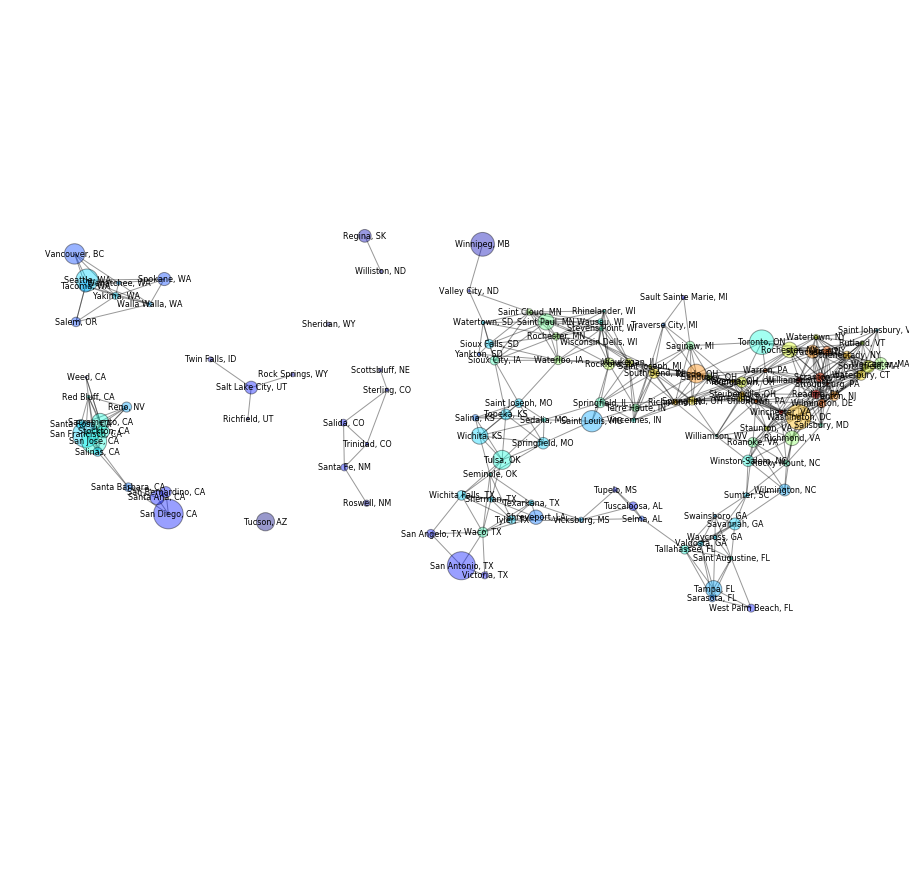

In [11]:
city_graph = main(os.path.join(DATADIR,'miles_dat.txt.gz'),max_dist=300)

# Shortest Paths through USA Cities

In [27]:
cities = city_graph.nodes()

In [28]:
cities

['Winston-Salem, NC',
 'San Angelo, TX',
 'Savannah, GA',
 'San Francisco, CA',
 'Victoria, TX',
 'Sault Sainte Marie, MI',
 'Waterloo, IA',
 'Salina, KS',
 'Seminole, OK',
 'Richfield, UT',
 'Rochester, NY',
 'Rockford, IL',
 'Washington, DC',
 'Wichita Falls, TX',
 'Santa Fe, NM',
 'Tallahassee, FL',
 'Twin Falls, ID',
 'Salt Lake City, UT',
 'Rutland, VT',
 'Sedalia, MO',
 'Vicksburg, MS',
 'Waterbury, CT',
 'Salem, OR',
 'Yankton, SD',
 'Wenatchee, WA',
 'Tuscaloosa, AL',
 'Vancouver, BC',
 'Tyler, TX',
 'Sumter, SC',
 'Schenectady, NY',
 'Roanoke, VA',
 'Terre Haute, IN',
 'San Antonio, TX',
 'Weed, CA',
 'Trenton, NJ',
 'Valley City, ND',
 'Sioux City, IA',
 'Winchester, VA',
 'San Diego, CA',
 'Trinidad, CO',
 'Scranton, PA',
 'Red Bluff, CA',
 'Walla Walla, WA',
 'Syracuse, NY',
 'Williamsport, PA',
 'Selma, AL',
 'Wheeling, WV',
 'Seattle, WA',
 'Scottsbluff, NE',
 'Tupelo, MS',
 'Sherman, TX',
 'Ravenna, OH',
 'Richmond, IN',
 'Sacramento, CA',
 'Saint Louis, MO',
 'Saint Jos

In [29]:
origin = random.choice(cities)
dest = random.choice(cities)
print("%s -> %s"%(origin, dest))
weighted_path = nx.shortest_path(city_graph, origin, dest, weight="weight")
unweighted_path = nx.shortest_path(city_graph, origin, dest)
print(weighted_path)
print("*"*42)
print(unweighted_path)

Saint Cloud, MN -> Texarkana, TX
['Saint Cloud, MN', 'Sioux City, IA', 'Topeka, KS', 'Tulsa, OK', 'Seminole, OK', 'Texarkana, TX']
******************************************
['Saint Cloud, MN', 'Sioux City, IA', 'Topeka, KS', 'Tulsa, OK', 'Seminole, OK', 'Texarkana, TX']


## How could we compute the actual distance along the path?